before (600, 900)


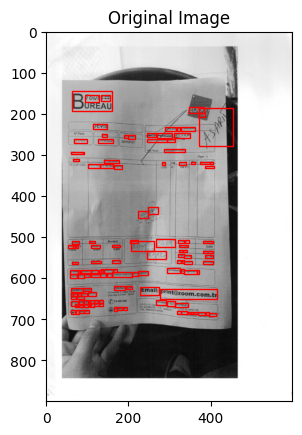

after (600, 900)


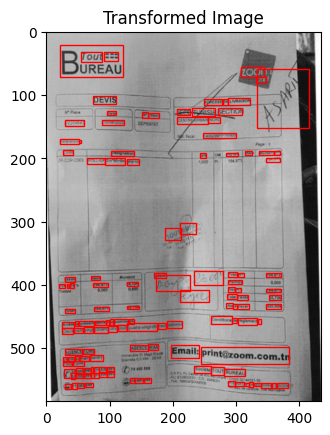

In [10]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt
from albumentations.pytorch import ToTensorV2
import numpy as np
from PIL import Image

# Define the transformation
def get_train_transform():
    return A.Compose([
        A.MedianBlur(blur_limit=3, p=0.3),
        A.ColorJitter(p=0.3),
        A.PadIfNeeded(min_height=1000, min_width=700, border_mode=cv2.BORDER_CONSTANT, value=[255, 255, 255], p=1.0),
        A.Rotate(limit=5, p=1, interpolation=cv2.INTER_CUBIC),
    ], bbox_params=A.BboxParams(
        format='pascal_voc',
        label_fields=['labels'],
        min_area=0,
        min_visibility=0.1  
    ))

# def resize_image_and_adjust_boxes(image_np, boxes, new_width=600, new_height=900):
#     old_width, old_height = image_np.shape[1], image_np.shape[0]
#     image_resized = Image.fromarray(image_np).resize((new_width, new_height), resample=Image.BILINEAR)
#     image_resized = np.array(image_resized)

#     adjusted_boxes = []
#     for box in boxes:
#         x_min_scaled = int(box[0] * new_width / old_width)
#         y_min_scaled = int(box[1] * new_height / old_height)
#         x_max_scaled = int(box[2] * new_width / old_width)
#         y_max_scaled = int(box[3] * new_height / old_height)
#         adjusted_boxes.append([x_min_scaled, y_min_scaled, x_max_scaled, y_max_scaled])

#     return image_resized, adjusted_boxes

def crop_to_bounding_boxes(image_np, boxes):
    if not boxes:
        return image_np  # Return original if no boxes

    # Initialize min and max coordinates with values from the first box
    x_min = boxes[0][0]
    y_min = boxes[0][1]
    x_max = boxes[0][2]
    y_max = boxes[0][3]

    # Iterate over all boxes to find the minimum and maximum extents
    for box in boxes:
        x_min = min(x_min, box[0])
        y_min = min(y_min, box[1])
        x_max = max(x_max, box[2])
        y_max = max(y_max, box[3])

    # Crop the image using the min and max coordinates
    image_cropped = transformed_image[y_min-20:y_max+20, x_min-20:x_max+20]

    adjusted_boxes = []
    for box in boxes:
        adjusted_box = [
            box[0] - x_min+20 ,
            box[1] - y_min+20,
            box[2] - x_min+20,
            box[3] - y_min+20
        ]
        adjusted_boxes.append(adjusted_box)

    return image_cropped, adjusted_boxes



# Function to visualize the image and bounding boxes
def visualize_image(image_np, bboxes, title=""):
    fig, ax = plt.subplots(1)
    ax.imshow(image_np)
    for bbox in bboxes:
        rect = plt.Rectangle((bbox[0], bbox[1]), bbox[2] - bbox[0], bbox[3] - bbox[1], linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    plt.title(title)
    plt.show()

# Load an image
image_path = 'resized_images/INV.34.pdf_1.png'  # Update this path
image = Image.open(image_path).convert("RGB")
image_np = np.array(image)

print('before',image.size)

# Visualize original image
visualize_image(image_np, bboxes, title="Original Image")
# Apply transformations
transform = get_train_transform()
transformed = transform(image=image_np, bboxes=bboxes, labels=labels)
transformed_image = transformed['image']
transformed_boxes = transformed['bboxes']

boxes = [[int(box[0]), int(box[1]), int(box[2]), int(box[3] )] for box in transformed_boxes]
        # cropped_image, boxes = crop_to_bounding_boxes(image_np, boxes)
cropped_image,adjusted_boxes = crop_to_bounding_boxes(image_np, boxes)
        # Usage:
# resized_image, boxes = resize_image_and_adjust_boxes(cropped_image, adjusted_boxes)
boxes = [[int(box[0]), int(box[1]), int(box[2]), int(box[3] )] for box in adjusted_boxes]
# print(f"After transformation: {len(words)} words, {len(boxes)} boxes")
image = Image.fromarray(cropped_image)  # Convert the NumPy image array back to PIL Image
image = image.resize((600, 900), resample=Image.BILINEAR)

print('after',image.size)
width, height = image.size


# Visualize transformed image
visualize_image(cropped_image, boxes, title="Transformed Image")


before (600, 900)


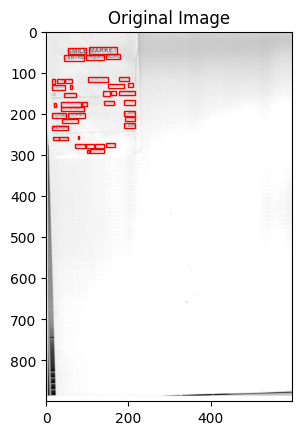

after (600, 900)


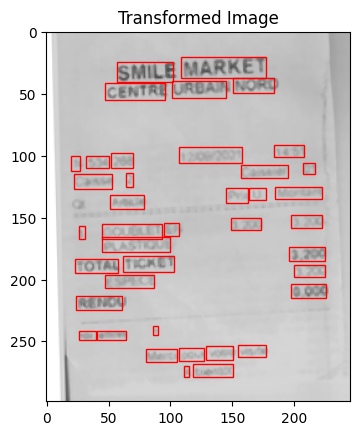

In [12]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt
from albumentations.pytorch import ToTensorV2
import numpy as np
from PIL import Image

# Define the transformation
def get_train_transform():
    return A.Compose([
        A.MedianBlur(blur_limit=3, p=0.3),
        A.ColorJitter(p=0.3),
        A.PadIfNeeded(min_height=1000, min_width=700, border_mode=cv2.BORDER_CONSTANT, value=[255, 255, 255], p=1.0),
        A.Rotate(limit=5, p=1, interpolation=cv2.INTER_CUBIC),
    ], bbox_params=A.BboxParams(
        format='pascal_voc',
        label_fields=['labels'],
        min_area=0,
        min_visibility=0.1  
    ))

# def resize_image_and_adjust_boxes(image_np, boxes, new_width=600, new_height=900):
#     old_width, old_height = image_np.shape[1], image_np.shape[0]
#     image_resized = Image.fromarray(image_np).resize((new_width, new_height), resample=Image.BILINEAR)
#     image_resized = np.array(image_resized)

#     adjusted_boxes = []
#     for box in boxes:
#         x_min_scaled = int(box[0] * new_width / old_width)
#         y_min_scaled = int(box[1] * new_height / old_height)
#         x_max_scaled = int(box[2] * new_width / old_width)
#         y_max_scaled = int(box[3] * new_height / old_height)
#         adjusted_boxes.append([x_min_scaled, y_min_scaled, x_max_scaled, y_max_scaled])

#     return image_resized, adjusted_boxes

def crop_to_bounding_boxes(image_np, boxes):
    if not boxes:
        return image_np  # Return original if no boxes

    # Initialize min and max coordinates with values from the first box
    x_min = boxes[0][0]
    y_min = boxes[0][1]
    x_max = boxes[0][2]
    y_max = boxes[0][3]

    # Iterate over all boxes to find the minimum and maximum extents
    for box in boxes:
        x_min = min(x_min, box[0])
        y_min = min(y_min, box[1])
        x_max = max(x_max, box[2])
        y_max = max(y_max, box[3])

    # Crop the image using the min and max coordinates
    image_cropped = transformed_image[y_min-20:y_max+20, x_min-20:x_max+20]

    adjusted_boxes = []
    for box in boxes:
        adjusted_box = [
            box[0] - x_min+20 ,
            box[1] - y_min+20,
            box[2] - x_min+20,
            box[3] - y_min+20
        ]
        adjusted_boxes.append(adjusted_box)

    return image_cropped, adjusted_boxes



# Function to visualize the image and bounding boxes
def visualize_image(image_np, bboxes, title=""):
    fig, ax = plt.subplots(1)
    ax.imshow(image_np)
    for bbox in bboxes:
        rect = plt.Rectangle((bbox[0], bbox[1]), bbox[2] - bbox[0], bbox[3] - bbox[1], linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    plt.title(title)
    plt.show()

# Load an image
image_path = 'resized_images/20231217_190133_merged-69.pdf_1.png'  # Update this path
image = Image.open(image_path).convert("RGB")
image_np = np.array(image)

print('before',image.size)

# Visualize original image
visualize_image(image_np, bboxes, title="Original Image")
# Apply transformations
transform = get_train_transform()
transformed = transform(image=image_np, bboxes=bboxes, labels=labels)
transformed_image = transformed['image']
transformed_boxes = transformed['bboxes']

boxes = [[int(box[0]), int(box[1]), int(box[2]), int(box[3] )] for box in transformed_boxes]
        # cropped_image, boxes = crop_to_bounding_boxes(image_np, boxes)
cropped_image,adjusted_boxes = crop_to_bounding_boxes(image_np, boxes)
        # Usage:
# resized_image, boxes = resize_image_and_adjust_boxes(cropped_image, adjusted_boxes)
boxes = [[int(box[0]), int(box[1]), int(box[2]), int(box[3] )] for box in adjusted_boxes]
# print(f"After transformation: {len(words)} words, {len(boxes)} boxes")
image = Image.fromarray(cropped_image)  # Convert the NumPy image array back to PIL Image
image = image.resize((600, 900), resample=Image.BILINEAR)

print('after',image.size)
width, height = image.size


# Visualize transformed image
visualize_image(cropped_image, boxes, title="Transformed Image")


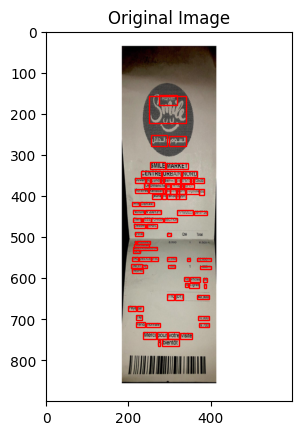

TypeError: list indices must be integers or slices, not tuple

In [4]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def get_train_transform():
    return A.Compose([
        A.MedianBlur(blur_limit=3, p=0.3),
        A.ColorJitter(p=0.3),
        A.PadIfNeeded(min_height=1000, min_width=700, border_mode=cv2.BORDER_CONSTANT, value=[255, 255, 255], p=1.0),
        A.Rotate(limit=5, p=1, interpolation=cv2.INTER_CUBIC),
    ], bbox_params=A.BboxParams(
        format='pascal_voc',
        label_fields=['labels'],
        min_area=0,
        min_visibility=0.1  
    ))

def visualize_image(image_np, bboxes, title=""):
    fig, ax = plt.subplots(1)
    ax.imshow(image_np)
    for bbox in bboxes:
        rect = plt.Rectangle((bbox[0], bbox[1]), bbox[2] - bbox[0], bbox[3] - bbox[1], linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    plt.title(title)
    plt.show()

def crop_to_bounding_boxes(image_np, boxes):
    if not boxes:
        return image_np  

    # Initialize min and max coordinates with values from the first box
    x_min = boxes[0][0]
    y_min = boxes[0][1]
    x_max = boxes[0][2]
    y_max = boxes[0][3]

    # Iterate over all boxes to find the minimum and maximum extents
    for box in boxes:
        x_min = min(x_min, box[0])
        y_min = min(y_min, box[1])
        x_max = max(x_max, box[2])
        y_max = max(y_max, box[3])

    # Crop the image using the min and max coordinates
    image_cropped = image_np[y_min-20:y_max+20, x_min-20:x_max+20]

    adjusted_boxes = []
    for box in boxes:
        adjusted_box = [
            box[0] - x_min+20 ,
            box[1] - y_min+20,
            box[2] - x_min+20,
            box[3] - y_min+20
        ]
        adjusted_boxes.append(adjusted_box)

    return image_cropped, adjusted_boxes


image_path = 'resized_images/factures_merged machine-13.pdf_1.png'  # Update this path
image = Image.open(image_path).convert("RGB")
image_np = np.array(image)
visualize_image(image_np, bboxes, title="Original Image")

boxes = [[int(box[0]), int(box[1]), int(box[2]), int(box[3] )] for box in bboxes]
# print(boxes)

transform = get_train_transform()
transformed = transform(image=image_np, bboxes=boxes, labels=labels)
transformed_image = transformed['image']
transformed_boxes = transformed['bboxes']

boxes = [[int(box[0]), int(box[1]), int(box[2]), int(box[3] )] for box in transformed_boxes]
# print(boxes)

cropped_image, adjusted_boxes = crop_to_bounding_boxes(boxes, transformed_boxes)
print('before resize', cropped_image.shape)

image = Image.fromarray(cropped_image)  # Convert the NumPy image array back to PIL Image
resized_image = image.resize((600, 900))
print('after resize', resized_image.size)

visualize_image(np.array(resized_image), adjusted_boxes, title="Transformed and Cropped Image")


# import numpy as np
# from PIL import Image
# import torch
# from torch.utils.data import Dataset

# class CustomDataset(Dataset):
#     def __init__(self, annotation_dir, image_dir, annotation_files, transforms=None):
#         self.annotations = [os.path.join(annotation_dir, file) for file in annotation_files]
#         self.image_dir = image_dir
#         self.processor = processor  
#         self.transforms = transforms


#     def __getitem__(self, idx):
#         annotation_path = self.annotations[idx]
#         with open(annotation_path, 'r') as f:
#             data = json.load(f)

#         image_path = os.path.join(self.image_dir, os.path.basename(data["path"]))
#         image = Image.open(image_path).convert("RGB")
#         width, height = image.size

#         words = data["words"]
#         labels = [label2id[label] for label in data["ner_tags"]]

#         boxes = data["bboxes"]

#         # print("initial", boxes)
#         image_np = np.array(image)  # Convert PIL Image to NumPy array for transformation
#         print(f"Before transformation: {len(words)} words, {len(boxes)} boxes,{len(labels)} labels")
#         if self.transforms:
#             transformed = self.transforms(image=image_np, bboxes=boxes, labels=labels)
#             image_np = transformed['image']
#             boxes = transformed['bboxes']
#             labels = transformed['labels']
#         print(f"After transformation: {len(words)} words, {len(boxes)} boxes,{len(labels)} labels")


#         # Convert the NumPy image array back to PIL Image 
#         image = Image.fromarray(image_np)

#         # print("###################################################################################################################################")
#         # print("transformed", boxes)


#         boxes = [
#             [
#                 bbox[0] / width,  
#                 bbox[1] / height,  
#                 bbox[2] / width,  
#                 bbox[3] / height
#             ] for bbox in boxes
#         ]

#         # print("###################################################################################################################################")
#         # print("normalized", boxes)

        
#         boxes = [
#             [
#                 int(box[0] * 1000),  
#                 int(box[1] * 1000),  
#                 int(box[2] * 1000),  
#                 int(box[3] * 1000)  
#             ] for box in boxes
#         ]


#         encoding = self.processor(image, words, boxes=boxes, word_labels=labels, truncation=True, padding="max_length", return_tensors="pt")
#         bbox_tensor = torch.tensor(boxes, dtype=torch.long)
#         label_tensor = torch.tensor(labels, dtype=torch.long)

#         return {
#             'words': words,
#             'input_ids': encoding['input_ids'].squeeze(0),
#             'attention_mask': encoding['attention_mask'].squeeze(0),
#             'bbox': bbox_tensor,  
#             'labels': label_tensor
#         }


#     def __len__(self):
#         return len(self.annotations)

# import numpy as np
# from PIL import Image
# import torch
# from torch.utils.data import Dataset

# class CustomDataset(Dataset):
#     def __init__(self, annotation_dir, image_dir, annotation_files, transforms=None):
#         self.annotations = [os.path.join(annotation_dir, file) for file in annotation_files]
#         self.image_dir = image_dir
#         self.processor = processor  
#         self.transforms = transforms

#     def __getitem__(self, idx):
#         annotation_path = self.annotations[idx]
#         with open(annotation_path, 'r') as f:
#             data = json.load(f)

#         image_path = os.path.join(self.image_dir, os.path.basename(data["path"]))
#         image = Image.open(image_path).convert("RGB")
#         width, height = image.size

#         words = data["words"]
#         labels = [label2id[label] for label in data["ner_tags"]]
#         boxes = data["bboxes"]

#         image_np = np.array(image)  # Convert PIL Image to NumPy array for transformation
#         # print(f"Before transformation: {len(words)} words, {len(boxes)} boxes")

#         if self.transforms:
#             transformed = self.transforms(image=image_np, bboxes=boxes, labels=labels)
#             image_np = transformed['image']
#             boxes = transformed['bboxes']
#             labels = transformed['labels']

#         #     # Check if any boxes are out of image bounds and revert or adjust
#         #     boxes = self.check_and_adjust_boxes(boxes, width, height)

#         # print(f"After transformation: {len(words)} words, {len(boxes)} boxes")
#         image = Image.fromarray(image_np)  # Convert the NumPy image array back to PIL Image 

#         boxes = [[bbox[0] / width, bbox[1] / height, bbox[2] / width, bbox[3] / height] for bbox in boxes]
#         boxes = [[int(box[0] * 1000), int(box[1] * 1000), int(box[2] * 1000), int(box[3] * 1000)] for box in boxes]

#         encoding = self.processor(image, words, boxes=boxes, word_labels=labels, truncation=True, padding="max_length", return_tensors="pt")
#         bbox_tensor = torch.tensor(boxes, dtype=torch.long)
#         label_tensor = torch.tensor(labels, dtype=torch.long)

#         return {
#             'words': words,
#             'input_ids': encoding['input_ids'].squeeze(0),
#             'attention_mask': encoding['attention_mask'].squeeze(0),
#             'bbox': bbox_tensor,  
#             'labels': label_tensor
#         }

#     def __len__(self):
#         return len(self.annotations)

#     def check_and_adjust_boxes(self, boxes, img_width, img_height):
#         adjusted_boxes = []
#         for box in boxes:
#             x_min, y_min, x_max, y_max = box
#             if x_min < 0 or y_min < 0 or x_max > img_width or y_max > img_height:
#                 # Box is out of bounds, adjust or discard
#                 x_min = max(0, x_min)
#                 y_min = max(0, y_min)
#                 x_max = min(img_width, x_max)
#                 y_max = min(img_height, y_max)
#             adjusted_boxes.append([x_min, y_min, x_max, y_max])
#         return adjusted_boxes


In [11]:
# Define sample boxes and labels (update this according to your actual data)
bboxes = [
        [
            52.0,
            40.0,
            97.00000000000001,
            55.00000000000001
        ],
        [
            104.0,
            38.0,
            172.0,
            54.0
        ],
        [
            42.00000000000001,
            57.00000000000001,
            91.0,
            70.0
        ],
        [
            96.0,
            56.0,
            140.0,
            69.0
        ],
        [
            146.0,
            55.0,
            179.0,
            67.0
        ],
        [
            14.0,
            114.99999999999999,
            20.0,
            125.99999999999999
        ],
        [
            26.0,
            114.99999999999999,
            43.0,
            124.99999999999999
        ],
        [
            46.0,
            114.00000000000001,
            63.0,
            125.0
        ],
        [
            101.0,
            111.0,
            151.0,
            122.99999999999999
        ],
        [
            178.0,
            110.0,
            202.0,
            118.99999999999999
        ],
        [
            15.0,
            130.0,
            46.0,
            140.99999999999997
        ],
        [
            57.0,
            130.0,
            63.0,
            139.99999999999997
        ],
        [
            150.0,
            126.00000000000001,
            188.0,
            136.0
        ],
        [
            200.0,
            125.0,
            210.0,
            134.0
        ],
        [
            44.0,
            148.0,
            72.0,
            158.0
        ],
        [
            138.0,
            144.0,
            156.0,
            155.0
        ],
        [
            157.0,
            144.0,
            170.0,
            154.0
        ],
        [
            178.0,
            144.0,
            216.00000000000003,
            153.0
        ],
        [
            18.0,
            172.0,
            23.0,
            182.0
        ],
        [
            37.0,
            171.0,
            85.0,
            182.0
        ],
        [
            87.0,
            171.0,
            98.99999999999999,
            181.0
        ],
        [
            141.0,
            168.0,
            164.99999999999997,
            178.0
        ],
        [
            190.0,
            167.0,
            215.0,
            177.0
        ],
        [
            37.0,
            182.0,
            92.0,
            193.0
        ],
        [
            15.0,
            198.0,
            49.0,
            209.0
        ],
        [
            54.0,
            197.0,
            94.0,
            209.0
        ],
        [
            188.0,
            193.0,
            216.00000000000003,
            204.0
        ],
        [
            38.0,
            212.0,
            78.0,
            221.99999999999997
        ],
        [
            191.0,
            207.0,
            216.00000000000003,
            217.0
        ],
        [
            15.0,
            228.00000000000003,
            52.0,
            239.00000000000003
        ],
        [
            189.0,
            223.0,
            217.00000000000003,
            234.0
        ],
        [
            16.0,
            257.0,
            30.0,
            264.0
        ],
        [
            31.0,
            257.0,
            54.0,
            264.0
        ],
        [
            76.0,
            254.0,
            80.0,
            261.0
        ],
        [
            70.0,
            272.0,
            95.0,
            283.0
        ],
        [
            96.99999999999999,
            272.0,
            116.99999999999999,
            282.0
        ],
        [
            119.0,
            272.0,
            141.0,
            282.0
        ],
        [
            145.0,
            271.0,
            167.0,
            281.0
        ],
        [
            100.0,
            287.0,
            103.99999999999999,
            296.0
        ],
        [
            107.0,
            286.0,
            140.0,
            296.0
        ]
    ]
labels = [
        "O",
        "O",
        "O",
        "O",
        "O",
        "O",
        "O",
        "O",
        "B-date",
        "O",
        "O",
        "O",
        "O",
        "O",
        "O",
        "O",
        "O",
        "O",
        "O",
        "O",
        "O",
        "O",
        "O",
        "B-total",
        "I-total",
        "I-total",
        "B-totalValue",
        "O",
        "O",
        "O",
        "O",
        "O",
        "O",
        "O",
        "O",
        "O",
        "O",
        "O",
        "O",
        "O"
    ]